## Experimentos com cross validation

### Bibliotecas

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import make_scorer, recall_score
from skopt import BayesSearchCV
from skopt.space import Categorical, Real
import numpy as np
import warnings

#Estilizar conteúdo
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

def estilo_tabelas(df, max_altura='300px', casas_decimais=3):
    return (
        df.style.set_table_styles(
            [
                {'selector': 'thead th', 'props': [('font-size', '12px'), ('text-align', 'center'), ('border-bottom', '2px solid #007BFF')]},
                {'selector': 'td', 'props': [('font-size', '10px'), ('text-align', 'center'), ('max-height', '40px'), ('white-space', 'nowrap'), ('text-overflow', 'ellipsis'), ('overflow', 'hidden'), ('max-width', '100px')]},
                {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]},
                {'selector': 'table', 'props': [('width', '90%'), ('margin-left', 'auto'), ('margin-right', 'auto'), ('border-collapse', 'collapse')]},
                {'selector': 'td, th', 'props': [('border', '1px solid #666')]},  # Bordas cinza escuro
            ]
        ).set_properties(
            **{'border-color': 'darkgray', 'border-style': 'solid', 'border-width': '1px'}
        ).set_table_attributes(
            f'style="height:auto; overflow:auto; max-height:{max_altura}; display:block;"'  
        ).format(
            precision=casas_decimais  
        )
    )

#Matriz de confusão

def exibe_matrizes_confusao(dicio_matrizes):
    fig, axn = plt.subplots(1, 4,  sharey=True, figsize=(10, 2))
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.5)
    for i, ax in enumerate(axn.flat):
        k = list(dicio_matrizes)[i]

        ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=8)
        ax.set_title(k,fontsize=8)

        sns.heatmap(dicio_matrizes[k], ax=ax,cbar=i==4)
        sns.heatmap(dicio_matrizes[k], annot=True, fmt="d", cmap="Blues", ax=ax, cbar=i==4,
                xticklabels=['Não Reconhecido', 'Reconhecido'],
                yticklabels=['Não Reconhecido', 'Reconhecido'],)

### Bases de dados

In [8]:
df1 = pd.read_csv(
    "https://raw.githubusercontent.com/brunagmoura/PrevisorReconhecimento/refs/heads/main/df_eventos_2010_2017_modelo1.csv",
    sep=';',
    decimal=',',
)

df2 = pd.read_csv(
    "https://raw.githubusercontent.com/brunagmoura/PrevisorReconhecimento/refs/heads/main/df_eventos_2010_2017_modelo2.csv",
    sep=';',
    decimal=',',
)

df3 = pd.read_csv(
    "https://raw.githubusercontent.com/brunagmoura/PrevisorReconhecimento/refs/heads/main/df_eventos_2018_2024_modelo1.csv",
    sep=';',
    decimal=',',
)

df4 = pd.read_csv(
    "https://raw.githubusercontent.com/brunagmoura/PrevisorReconhecimento/refs/heads/main/df_eventos_2018_2024_modelo2.csv",
    sep=';',
    decimal=',',
)

# Remove nulos
df2 = df2[df2['DensidadePop'].notnull()]
df4 = df4[df4['DensidadePop'].notnull()]
df3 = df3[df3['DOMICILIO_AREARURAL'].notnull()]
df4 = df4[df4['DOMICILIO_AREARURAL'].notnull()]

# Criar dicionário python com uma descrição para cada conjunto de dados
dict_dfs = {
    "Modelo 1 - 2010 a 2017 - agregado": df1,
    "Modelo 2 - 2010 a 2017 - desagregado": df2,
    "Modelo 3 - 2018 a 2024 - agregado": df3,
    "Modelo 4 - 2018 a 2024 - desagregado": df4,
}

print("Dimensões base de dados variáveis agregadas 2010-2017: ", df1.shape)
print("Dimensões base de dados variáveis agregadas 2018-2024: ", df2.shape)
print("Dimensões base de dados variáveis desagregadas 2010-2017: ",df3.shape)
print("Dimensões base de dados variáveis desagregadas 2018-2024: ",df4.shape)

Dimensões base de dados variáveis agregadas 2010-2017:  (13047, 56)
Dimensões base de dados variáveis agregadas 2018-2024:  (8600, 117)
Dimensões base de dados variáveis desagregadas 2010-2017:  (13170, 61)
Dimensões base de dados variáveis desagregadas 2018-2024:  (8275, 122)


### Modelos com hiperparâmetros - CV - 3

Melhores hiperparâmetros para Modelo 1 - 2010 a 2017 - agregado: OrderedDict([('log_reg__C', 0.001), ('log_reg__class_weight', None), ('log_reg__penalty', 'l1')])
Classification report para Modelo 1 - 2010 a 2017 - agregado: 



,precision,recall,f1-score,support
Não reconhecido,0.000,0.000,0.000,234.000
Reconhecido,0.910,1.000,0.953,2376.000
accuracy,0.910,0.910,0.910,0.910
macro avg,0.455,0.500,0.477,2610.000
weighted avg,0.829,0.910,0.868,2610.000


Matriz de confusão para Modelo 1 - 2010 a 2017 - agregado: 



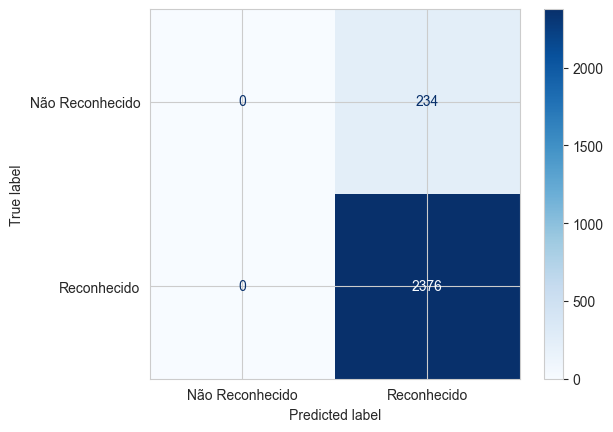

/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Melhores hiperparâmetros para Modelo 2 - 2010 a 2017 - desagregado: OrderedDict([('log_reg__C', 0.001), ('log_reg__class_weight', None), ('log_reg__penalty', 'l1')])
Classification report para Modelo 2 - 2010 a 2017 - desagregado: 



,precision,recall,f1-score,support
Não reconhecido,0.000,0.000,0.000,144.000
Reconhecido,0.916,0.999,0.956,1576.000
accuracy,0.915,0.915,0.915,0.915
macro avg,0.458,0.499,0.478,1720.000
weighted avg,0.839,0.915,0.876,1720.000


Matriz de confusão para Modelo 2 - 2010 a 2017 - desagregado: 



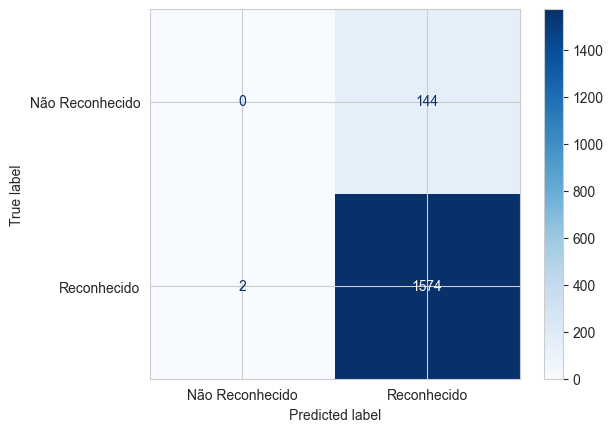

Melhores hiperparâmetros para Modelo 3 - 2018 a 2024 - agregado: OrderedDict([('log_reg__C', 0.1), ('log_reg__class_weight', None), ('log_reg__penalty', 'l1')])
Classification report para Modelo 3 - 2018 a 2024 - agregado: 



,precision,recall,f1-score,support
Não reconhecido,0.667,0.019,0.036,216.000
Reconhecido,0.919,0.999,0.958,2418.000
accuracy,0.919,0.919,0.919,0.919
macro avg,0.793,0.509,0.497,2634.000
weighted avg,0.899,0.919,0.882,2634.000


Matriz de confusão para Modelo 3 - 2018 a 2024 - agregado: 



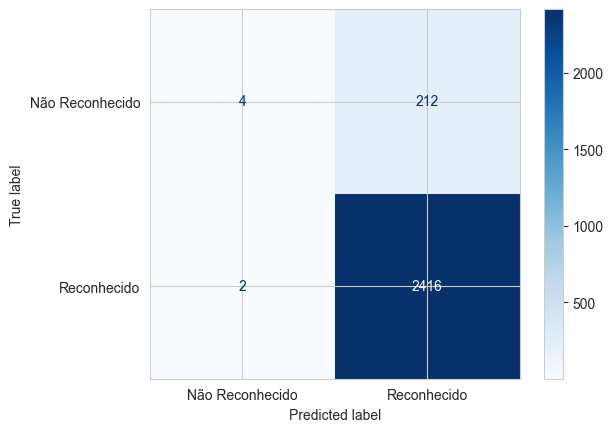

/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Melhores hiperparâmetros para Modelo 4 - 2018 a 2024 - desagregado: OrderedDict([('log_reg__C', 0.01), ('log_reg__class_weight', None), ('log_reg__penalty', 'l1')])
Classification report para Modelo 4 - 2018 a 2024 - desagregado: 



,precision,recall,f1-score,support
Não reconhecido,0.875,0.094,0.170,149.000
Reconhecido,0.918,0.999,0.956,1506.000
accuracy,0.917,0.917,0.917,0.917
macro avg,0.896,0.546,0.563,1655.000
weighted avg,0.914,0.917,0.886,1655.000


Matriz de confusão para Modelo 4 - 2018 a 2024 - desagregado: 



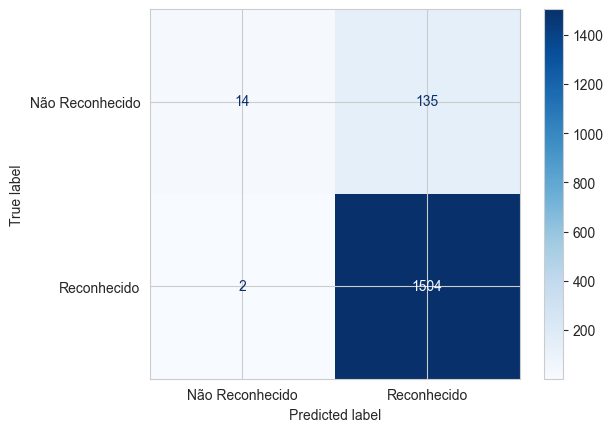

In [9]:
cf_matrix = dict.fromkeys(dict_dfs.keys())

for desc_modelo, df in dict_dfs.items():

    # Separa treino/teste
    X = df.drop("Status", axis=1)
    y = df["Status"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Pipeline
    pipeline = Pipeline(
        steps=[
            ("robust_scaler", RobustScaler()),
            ("log_reg", LogisticRegression(max_iter=1000, random_state=42, solver="liblinear", dual=False)),
        ]
    )

    # Hiperparâmetros
    param_grid = {
        "log_reg__class_weight": Categorical([None, 'balanced']),
        "log_reg__C": Categorical([0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]),  
        "log_reg__penalty": Categorical(["l2", "l1"])
    }

    # Configuração da busca bayesiana com validação cruzada
    scorer = make_scorer(recall_score)

    bayes_search = BayesSearchCV(
        pipeline,
        search_spaces=param_grid,
        scoring=scorer,
        cv=3,
        n_jobs=-1,
        random_state=42,
    )
    
    # Ajuste da busca
    bayes_search.fit(X_train, y_train)
    best_logreg_model = bayes_search.best_estimator_

    # Exibir os melhores hiperparâmetros
    print(f"Melhores hiperparâmetros para {desc_modelo}: {bayes_search.best_params_}")

    # Previsões no conjunto de teste
    y_pred_tuned = best_logreg_model.predict(X_test)

    # Classification report como DataFrame
    df_cr = pd.DataFrame(
        metrics.classification_report(y_test, y_pred_tuned, output_dict=True, target_names=["Não reconhecido", "Reconhecido"])
    ).transpose()  # Transpor para melhor visualização

    # Aplicar o estilo personalizado
    df_cr_styled = estilo_tabelas(df_cr)

    # Exibir o classification report estilizado
    print(f'Classification report para {desc_modelo}: \n')
    display(df_cr_styled)  # Usando display() para mostrar o estilo no ambiente Jupyter/Notebooks

    # Confusion Matrix usando ConfusionMatrixDisplay.from_estimator
    print(f'Matriz de confusão para {desc_modelo}: \n')
    ConfusionMatrixDisplay.from_estimator(
        best_logreg_model, X_test, y_test, values_format='d', cmap='Blues', display_labels=['Não Reconhecido', 'Reconhecido']
    )
    plt.show() 

### Modelos com hiperparâmetros - CV - 5

Melhores hiperparâmetros para Modelo 1 - 2010 a 2017 - agregado: OrderedDict([('log_reg__C', 0.001), ('log_reg__class_weight', None), ('log_reg__penalty', 'l2')])
Classification report para Modelo 1 - 2010 a 2017 - agregado: 



,precision,recall,f1-score,support
Não reconhecido,0.000,0.000,0.000,234.000
Reconhecido,0.910,1.000,0.953,2376.000
accuracy,0.910,0.910,0.910,0.910
macro avg,0.455,0.500,0.477,2610.000
weighted avg,0.829,0.910,0.868,2610.000


Matriz de confusão para Modelo 1 - 2010 a 2017 - agregado: 



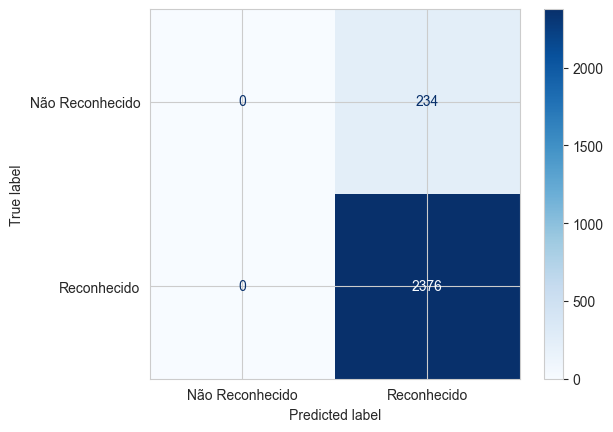

/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Melhores hiperparâmetros para Modelo 2 - 2010 a 2017 - desagregado: OrderedDict([('log_reg__C', 0.001), ('log_reg__class_weight', None), ('log_reg__penalty', 'l1')])
Classification report para Modelo 2 - 2010 a 2017 - desagregado: 



,precision,recall,f1-score,support
Não reconhecido,0.000,0.000,0.000,144.000
Reconhecido,0.916,0.999,0.956,1576.000
accuracy,0.915,0.915,0.915,0.915
macro avg,0.458,0.499,0.478,1720.000
weighted avg,0.839,0.915,0.876,1720.000


Matriz de confusão para Modelo 2 - 2010 a 2017 - desagregado: 



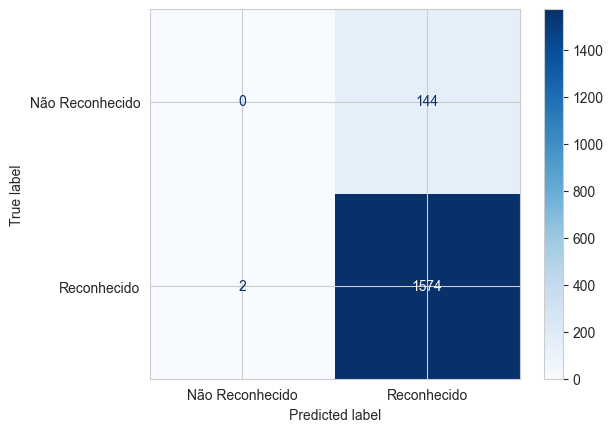

Melhores hiperparâmetros para Modelo 3 - 2018 a 2024 - agregado: OrderedDict([('log_reg__C', 0.001), ('log_reg__class_weight', None), ('log_reg__penalty', 'l2')])
Classification report para Modelo 3 - 2018 a 2024 - agregado: 



,precision,recall,f1-score,support
Não reconhecido,0.000,0.000,0.000,216.000
Reconhecido,0.918,1.000,0.957,2418.000
accuracy,0.918,0.918,0.918,0.918
macro avg,0.459,0.500,0.479,2634.000
weighted avg,0.843,0.918,0.879,2634.000


Matriz de confusão para Modelo 3 - 2018 a 2024 - agregado: 



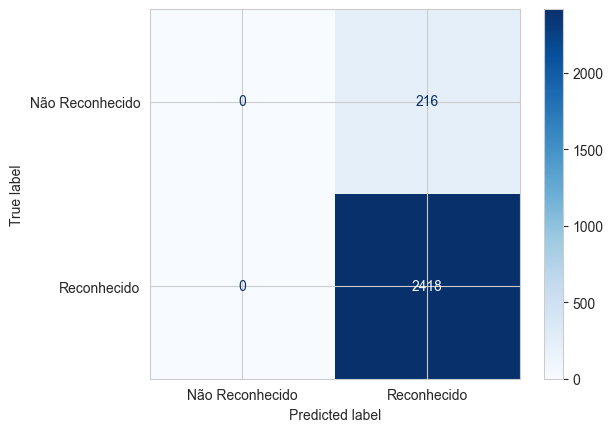

/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Melhores hiperparâmetros para Modelo 4 - 2018 a 2024 - desagregado: OrderedDict([('log_reg__C', 0.001), ('log_reg__class_weight', None), ('log_reg__penalty', 'l1')])
Classification report para Modelo 4 - 2018 a 2024 - desagregado: 



,precision,recall,f1-score,support
Não reconhecido,1.000,0.034,0.065,149.000
Reconhecido,0.913,1.000,0.954,1506.000
accuracy,0.913,0.913,0.913,0.913
macro avg,0.956,0.517,0.510,1655.000
weighted avg,0.921,0.913,0.874,1655.000


Matriz de confusão para Modelo 4 - 2018 a 2024 - desagregado: 



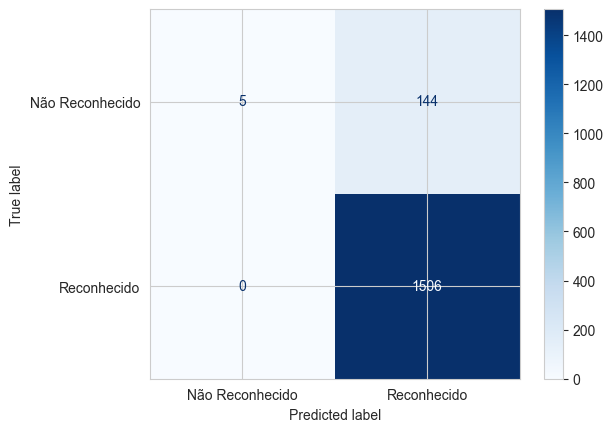

In [10]:
cf_matrix = dict.fromkeys(dict_dfs.keys())

for desc_modelo, df in dict_dfs.items():

    # Separa treino/teste
    X = df.drop("Status", axis=1)
    y = df["Status"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Pipeline
    pipeline = Pipeline(
        steps=[
            ("robust_scaler", RobustScaler()),
            ("log_reg", LogisticRegression(max_iter=1000, random_state=42, solver="liblinear", dual=False)),
        ]
    )

    # Hiperparâmetros
    param_grid = {
        "log_reg__class_weight": Categorical([None, 'balanced']),
        "log_reg__C": Categorical([0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]),  
        "log_reg__penalty": Categorical(["l2", "l1"])
    }

    # Configuração da busca bayesiana com validação cruzada
    scorer = make_scorer(recall_score)

    bayes_search = BayesSearchCV(
        pipeline,
        search_spaces=param_grid,
        scoring=scorer,
        cv=5,
        n_jobs=-1,
        random_state=42,
    )
    
    # Ajuste da busca
    bayes_search.fit(X_train, y_train)
    best_logreg_model = bayes_search.best_estimator_

    # Exibir os melhores hiperparâmetros
    print(f"Melhores hiperparâmetros para {desc_modelo}: {bayes_search.best_params_}")

    # Previsões no conjunto de teste
    y_pred_tuned = best_logreg_model.predict(X_test)

    # Classification report como DataFrame
    df_cr = pd.DataFrame(
        metrics.classification_report(y_test, y_pred_tuned, output_dict=True, target_names=["Não reconhecido", "Reconhecido"])
    ).transpose()  # Transpor para melhor visualização

    # Aplicar o estilo personalizado
    df_cr_styled = estilo_tabelas(df_cr)

    # Exibir o classification report estilizado
    print(f'Classification report para {desc_modelo}: \n')
    display(df_cr_styled)  # Usando display() para mostrar o estilo no ambiente Jupyter/Notebooks

    # Confusion Matrix usando ConfusionMatrixDisplay.from_estimator
    print(f'Matriz de confusão para {desc_modelo}: \n')
    ConfusionMatrixDisplay.from_estimator(
        best_logreg_model, X_test, y_test, values_format='d', cmap='Blues', display_labels=['Não Reconhecido', 'Reconhecido']
    )
    plt.show() 

### Modelos com hiperparâmetros - CV - 10


Melhores hiperparâmetros para Modelo 1 - 2010 a 2017 - agregado: OrderedDict([('log_reg__C', 0.001), ('log_reg__class_weight', None), ('log_reg__penalty', 'l2')])
Classification report para Modelo 1 - 2010 a 2017 - agregado: 



,precision,recall,f1-score,support
Não reconhecido,0.000,0.000,0.000,234.000
Reconhecido,0.910,1.000,0.953,2376.000
accuracy,0.910,0.910,0.910,0.910
macro avg,0.455,0.500,0.477,2610.000
weighted avg,0.829,0.910,0.868,2610.000


Matriz de confusão para Modelo 1 - 2010 a 2017 - agregado: 



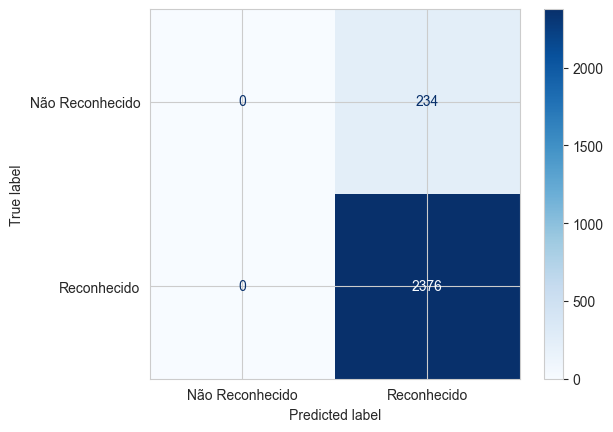

/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Melhores hiperparâmetros para Modelo 2 - 2010 a 2017 - desagregado: OrderedDict([('log_reg__C', 0.001), ('log_reg__class_weight', None), ('log_reg__penalty', 'l1')])
Classification report para Modelo 2 - 2010 a 2017 - desagregado: 



,precision,recall,f1-score,support
Não reconhecido,0.000,0.000,0.000,144.000
Reconhecido,0.916,0.999,0.956,1576.000
accuracy,0.915,0.915,0.915,0.915
macro avg,0.458,0.499,0.478,1720.000
weighted avg,0.839,0.915,0.876,1720.000


Matriz de confusão para Modelo 2 - 2010 a 2017 - desagregado: 



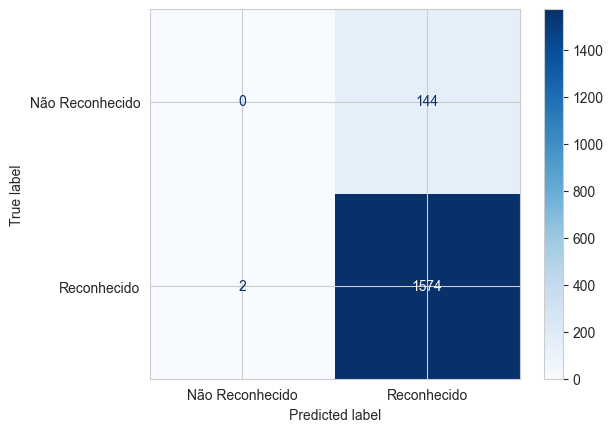

Melhores hiperparâmetros para Modelo 3 - 2018 a 2024 - agregado: OrderedDict([('log_reg__C', 0.001), ('log_reg__class_weight', None), ('log_reg__penalty', 'l2')])
Classification report para Modelo 3 - 2018 a 2024 - agregado: 



,precision,recall,f1-score,support
Não reconhecido,0.000,0.000,0.000,216.000
Reconhecido,0.918,1.000,0.957,2418.000
accuracy,0.918,0.918,0.918,0.918
macro avg,0.459,0.500,0.479,2634.000
weighted avg,0.843,0.918,0.879,2634.000


Matriz de confusão para Modelo 3 - 2018 a 2024 - agregado: 



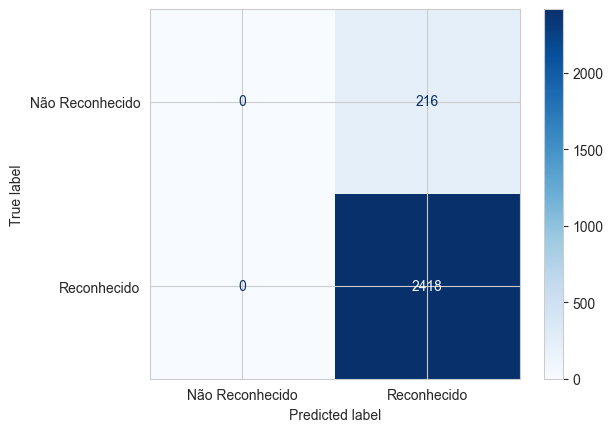

/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/brunamoura/PrevisorReconhecimento/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Melhores hiperparâmetros para Modelo 4 - 2018 a 2024 - desagregado: OrderedDict([('log_reg__C', 0.001), ('log_reg__class_weight', None), ('log_reg__penalty', 'l1')])
Classification report para Modelo 4 - 2018 a 2024 - desagregado: 



,precision,recall,f1-score,support
Não reconhecido,1.000,0.034,0.065,149.000
Reconhecido,0.913,1.000,0.954,1506.000
accuracy,0.913,0.913,0.913,0.913
macro avg,0.956,0.517,0.510,1655.000
weighted avg,0.921,0.913,0.874,1655.000


Matriz de confusão para Modelo 4 - 2018 a 2024 - desagregado: 



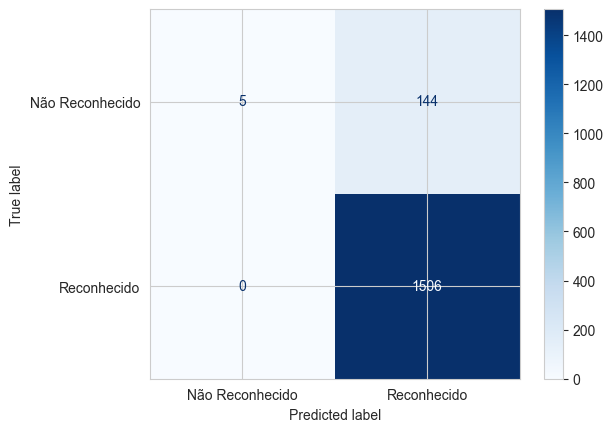

In [11]:
cf_matrix = dict.fromkeys(dict_dfs.keys())

for desc_modelo, df in dict_dfs.items():

    # Separa treino/teste
    X = df.drop("Status", axis=1)
    y = df["Status"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Pipeline
    pipeline = Pipeline(
        steps=[
            ("robust_scaler", RobustScaler()),
            ("log_reg", LogisticRegression(max_iter=1000, random_state=42, solver="liblinear", dual=False)),
        ]
    )

    # Hiperparâmetros
    param_grid = {
        "log_reg__class_weight": Categorical([None, 'balanced']),
        "log_reg__C": Categorical([0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]),  
        "log_reg__penalty": Categorical(["l2", "l1"])
    }

    # Configuração da busca bayesiana com validação cruzada
    scorer = make_scorer(recall_score)

    bayes_search = BayesSearchCV(
        pipeline,
        search_spaces=param_grid,
        scoring=scorer,
        cv=10,
        n_jobs=-1,
        random_state=42,
    )
    
    # Ajuste da busca
    bayes_search.fit(X_train, y_train)
    best_logreg_model = bayes_search.best_estimator_

    # Exibir os melhores hiperparâmetros
    print(f"Melhores hiperparâmetros para {desc_modelo}: {bayes_search.best_params_}")

    # Previsões no conjunto de teste
    y_pred_tuned = best_logreg_model.predict(X_test)

    # Classification report como DataFrame
    df_cr = pd.DataFrame(
        metrics.classification_report(y_test, y_pred_tuned, output_dict=True, target_names=["Não reconhecido", "Reconhecido"])
    ).transpose()  # Transpor para melhor visualização

    # Aplicar o estilo personalizado
    df_cr_styled = estilo_tabelas(df_cr)

    # Exibir o classification report estilizado
    print(f'Classification report para {desc_modelo}: \n')
    display(df_cr_styled)  # Usando display() para mostrar o estilo no ambiente Jupyter/Notebooks

    # Confusion Matrix usando ConfusionMatrixDisplay.from_estimator
    print(f'Matriz de confusão para {desc_modelo}: \n')
    ConfusionMatrixDisplay.from_estimator(
        best_logreg_model, X_test, y_test, values_format='d', cmap='Blues', display_labels=['Não Reconhecido', 'Reconhecido']
    )
    plt.show() 